# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 24 (Friday) 11:00 pm </b> </font>

<font color="blue"> type your name here </font>

# I. Introduction

For this task, I have implemented four different classification algorithms to predict discrete output variables based on input variables. The main goal of classification is to predict the class label of a given input by training on existing data. Sometimes, classification models may predict a continuous value as the probability of a specific class. However, this probability can be converted into a class label by selecting the class with the highest probability.

The four classification algorithms I implemented are Pocket algorithm, QDA (Quadratic Discriminant Analysis), LDA (Linear Discriminant Analysis), and Logistic Regression. After implementing these algorithms, I evaluated their performance using various evaluation metrics, which will be discussed later.





# II. Data

#### Instructions
Introduce your data and visualize them. Describe your observations about the data. You can reuse the data that you examined in Assignment #0 (of course for classification). Be sure this section is clearly labeled, introduces the data, describes how the data will be used (i.e., the objective), and provides details regarding the dataset such as what the features represent (i.e., a description of them), number of data samples, number of features, ect. At least 1 preoprocessing and visualization step. If no preprocessing steps are required, this should be clearly stated. Observations for visualizations and preprocessing steps provided meaningful descriptions concerning why a step was used, why it is important, details about the step, and insights concerning the results of the step.

The dataset includes 32,561 rows of data and provides information on a person's income through 14 attributes. The attributes and their corresponding data types are listed below:

age (int64)
workclass (object)
fnlwgt (int64)
education (object)
education-num (int64)
marital-status (object)
occupation (object)
relationship (object)
race (object)
sex (object)
capital-gain (int64)
capital-loss (int64)
hours-per-week (int64)
native-country (object)
income (object)

**Reading the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_c = pd.read_csv("/content/adult-2.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

# displaying all the columns data of top 10 rows in the jupyter notebook
pd.set_option('max_columns', 28)
df_c.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**Preprocessing of the data**

In [ ]:
# get the metadata; getting familiarized with columns and data-types
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# checking columns with null values
df_c.isna().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [ ]:
# clean up column names that have '-' in the dataframe

cols = df_c.columns
new_column_names = []

for col in cols:
    new_col = col.lstrip().rstrip().replace ("-", "_")
    new_column_names.append(new_col)

df_c.columns = new_column_names

df_c.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
df_c.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df_c.loc[df_c['workclass'] == '?', 'workclass'] = 'Unknown'

df_c.workclass.unique()

array(['Private', 'Local-gov', 'Unknown', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [ ]:
df_c.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
df_c.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
df_c.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
df_c.loc[df_c['occupation'] == '?', 'occupation'] = 'Unknown'

df_c.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Unknown', 'Other-service', 'Prof-specialty', 'Craft-repair',
       'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales',
       'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners',
       'Armed-Forces'], dtype=object)

In [ ]:
df_c.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [ ]:
df_c.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [ ]:
df_c.gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_c.native_country.unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [ ]:
df_c.loc[df_c['native_country'] == '?', 'native_country'] = 'Unknown'

df_c.native_country.unique()


array(['United-States', 'Unknown', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [ ]:
df_c.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df_c.loc[df_c['income'] == '<=50K', 'income'] = 'Low-income'
df_c.loc[df_c['income'] == '>50K', 'income'] = 'High-income'

df_c.income.unique()

array(['Low-income', 'High-income'], dtype=object)

**Visualization of the data**

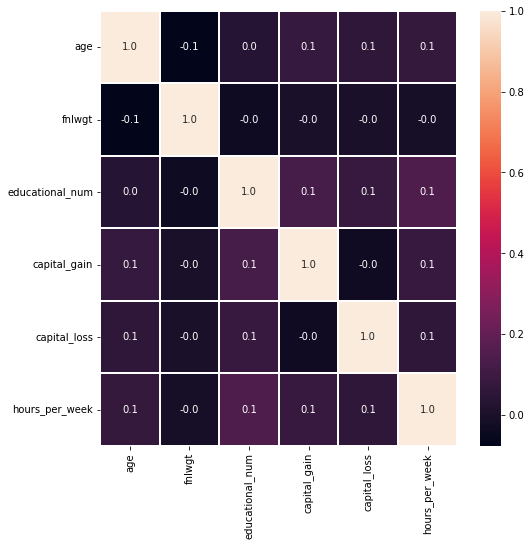

In [ ]:
f = plt.subplots(figsize=(8, 8))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

**Observation:**

Since income is an object type of data, it is not possible to retrieve correlation information with respect to it. This limitation is discussed further in the following section.

**Pie-chart**

In [ ]:
eduList = []
eduCount = []
for edu_name, subset in df_c.groupby('education'):
    eduList.append(edu_name)
    eduCount.append(len(subset))
print(eduList)
print(eduCount)

workclassList = []
workclassCount = []
for class_name, subset in df_c.groupby('workclass'):
    workclassList.append(class_name)
    workclassCount.append(len(subset))
print(workclassList)
print(workclassCount)

maritalList = []
maritalCount = []
for marital_name, subset in df_c.groupby('marital_status'):
    maritalList.append(marital_name)
    maritalCount.append(len(subset))
print(maritalList)
print(maritalCount)

occupationList = []
occupationCount = []
for occupation_name, subset in df_c.groupby('occupation'):
    occupationList.append(occupation_name)
    occupationCount.append(len(subset))
print(occupationList)
print(occupationCount)

relationshipList = []
relationshipCount = []
for relationship_name, subset in df_c.groupby('relationship'):
    relationshipList.append(relationship_name)
    relationshipCount.append(len(subset))
print(relationshipList)
print(relationshipCount)

raceList = []
raceCount = []
for race_name, subset in df_c.groupby('race'):
    raceList.append(race_name)
    raceCount.append(len(subset))
print(raceList)
print(raceCount)

genderList = []
genderCount = []
for gender_name, subset in df_c.groupby('gender'):
    genderList.append(gender_name)
    genderCount.append(len(subset))
print(genderList)
print(genderCount)

countryList = []
countryCount = []
for country_name, subset in df_c.groupby('native_country'):
    countryList.append(country_name)
    countryCount.append(len(subset))
print(countryList)
print(countryCount)

incomeList = []
incomeCount = []
for income_name, subset in df_c.groupby('income'):
    incomeList.append(income_name)
    incomeCount.append(len(subset))
print(incomeList)
print(incomeCount)

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
[1389, 1812, 657, 247, 509, 955, 756, 1601, 2061, 8025, 594, 15784, 2657, 83, 834, 10878]
['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Unknown', 'Without-pay']
[1432, 3136, 10, 33906, 1695, 3862, 1981, 2799, 21]
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
[6633, 37, 22379, 628, 16117, 1530, 1518]
['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Unknown']
[5611, 15, 6112, 6086, 1490, 2072, 3022, 4923, 242, 6172, 983, 5504, 1446, 2355, 2809]
['Husband', 'Not-in-family', 'Othe

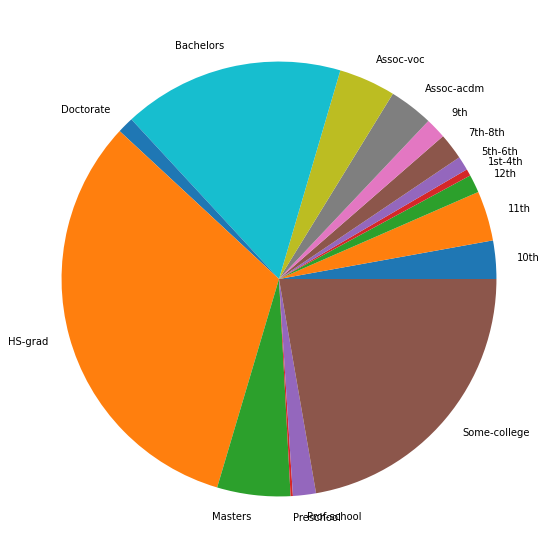

In [ ]:
plt.figure(figsize = (10, 10))
plt.pie(eduCount, labels = eduList)
plt.show()

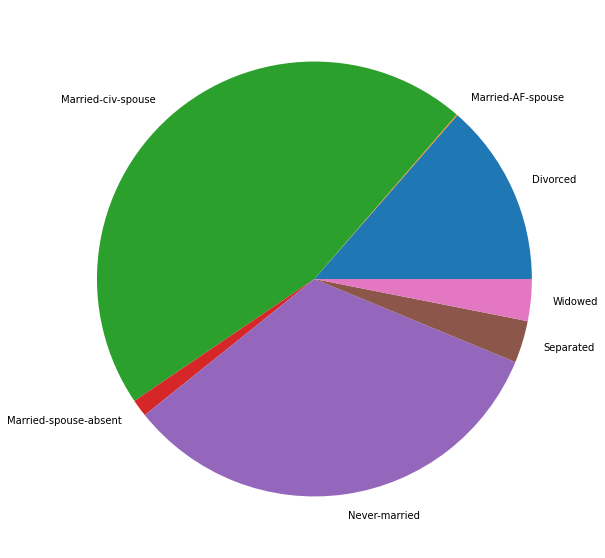

In [ ]:
plt.figure(figsize = (10, 10))
plt.pie(maritalCount, labels = maritalList)
plt.show()

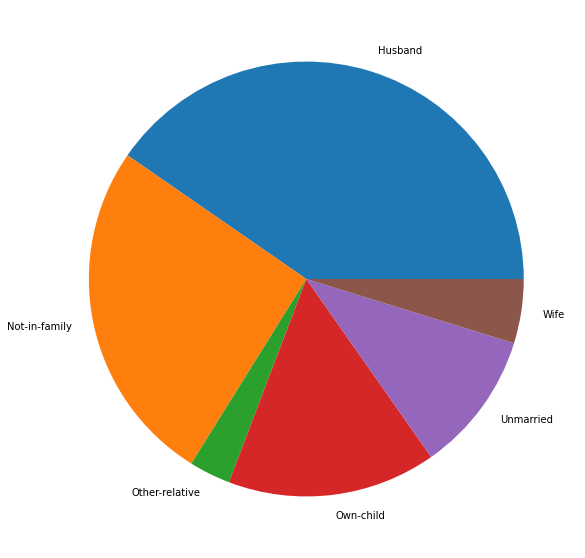

In [ ]:
plt.figure(figsize = (10, 10))
plt.pie(relationshipCount, labels = relationshipList)
plt.show()

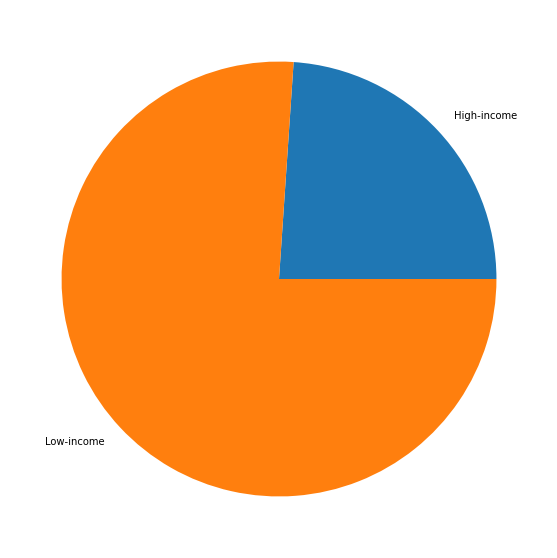

In [ ]:
plt.figure(figsize = (10, 10))
plt.pie(incomeCount, labels = incomeList)
plt.show()

**Bar Graph**

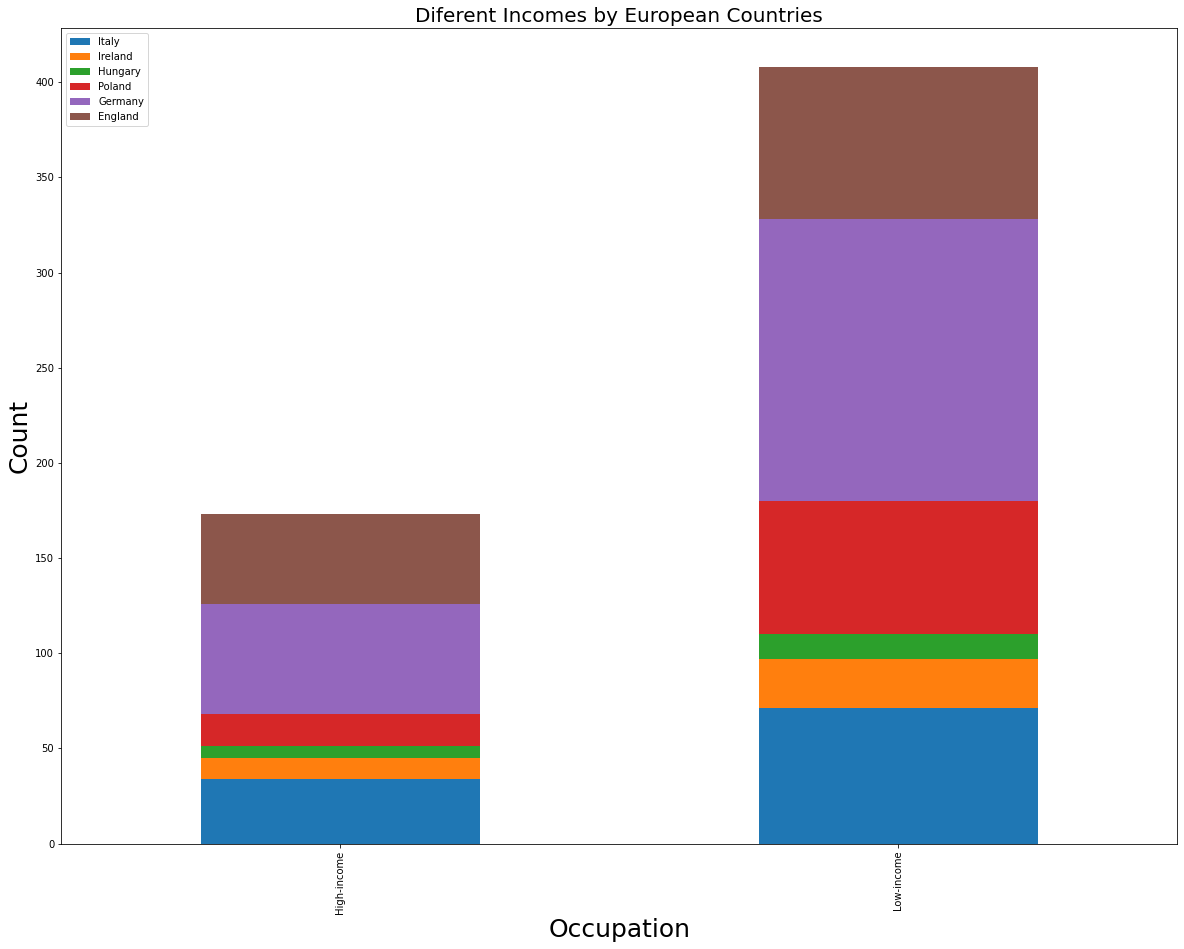

In [ ]:
it = df_c[df_c.native_country == 'Italy']['income'].value_counts(sort=False)
ir = df_c[df_c.native_country == 'Ireland']['income'].value_counts(sort=False)
h = df_c[df_c.native_country == 'Hungary']['income'].value_counts(sort=False)
po = df_c[df_c.native_country == 'Poland']['income'].value_counts(sort=False)
g = df_c[df_c.native_country == 'Germany']['income'].value_counts(sort=False)
e = df_c[df_c.native_country == 'England']['income'].value_counts(sort=False)

pd.DataFrame({'Italy': it, 'Ireland': ir, 'Hungary': h, 'Poland': po, 'Germany': g, 'England': e}).plot.bar(stacked=True)
plt.gcf().set_size_inches(20, 15)
plt.title("Diferent Incomes by European Countries", size=20)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=25)
plt.ylabel('Count', size=25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

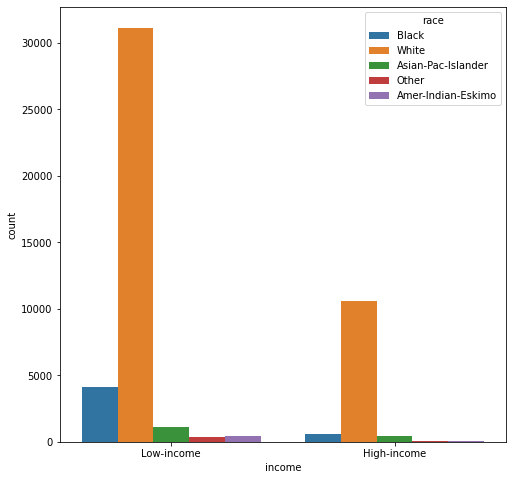

In [ ]:
fig = plt.subplots(figsize=(8,8))
sns.countplot(df_c['income'],hue=df_c['race'])

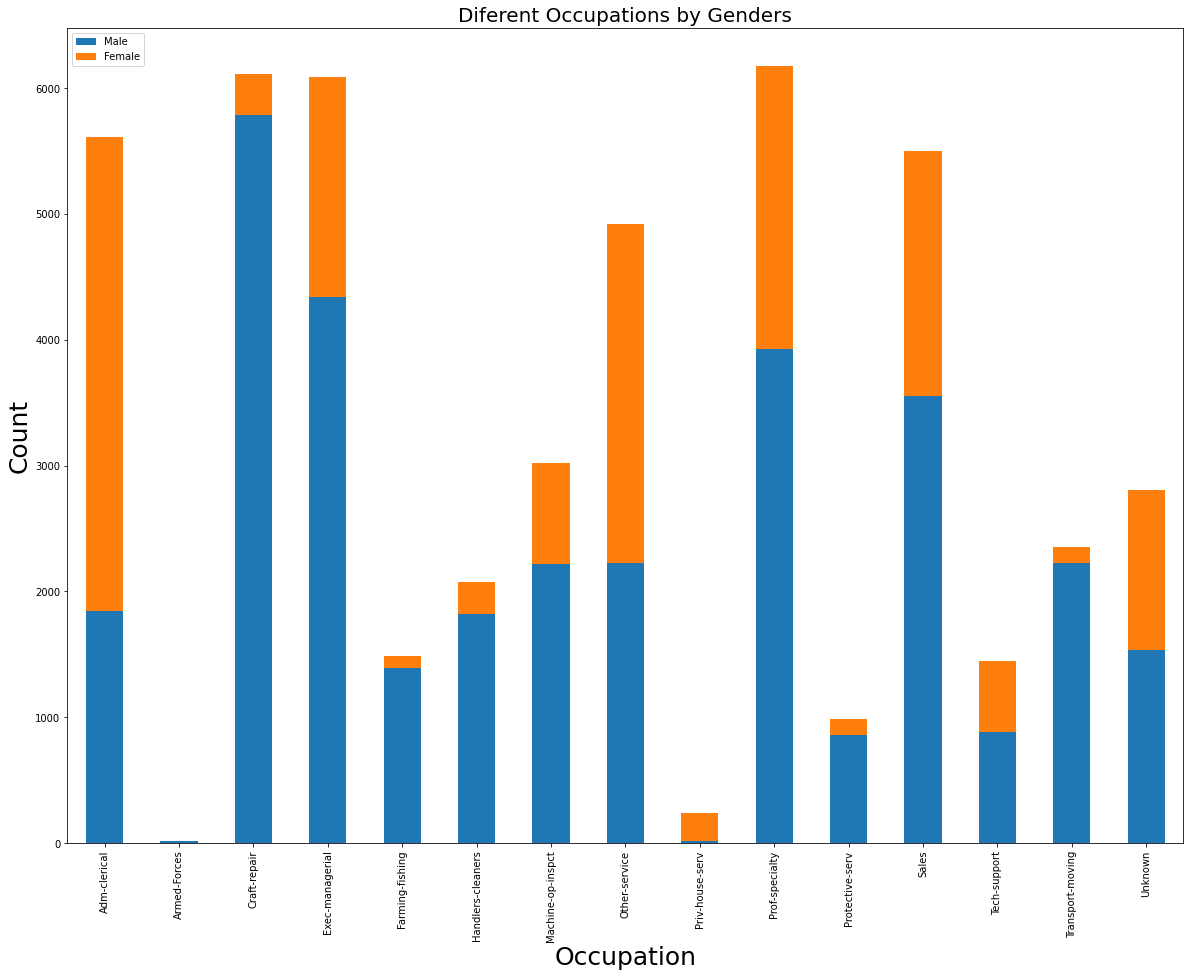

In [ ]:
m = df_c[df_c.gender == 'Male']['occupation'].value_counts(sort=False)
w = df_c[df_c.gender == 'Female']['occupation'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(20, 15)
plt.title("Diferent Occupations by Genders", size=20)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=25)
plt.ylabel('Count', size=25)
plt.show()

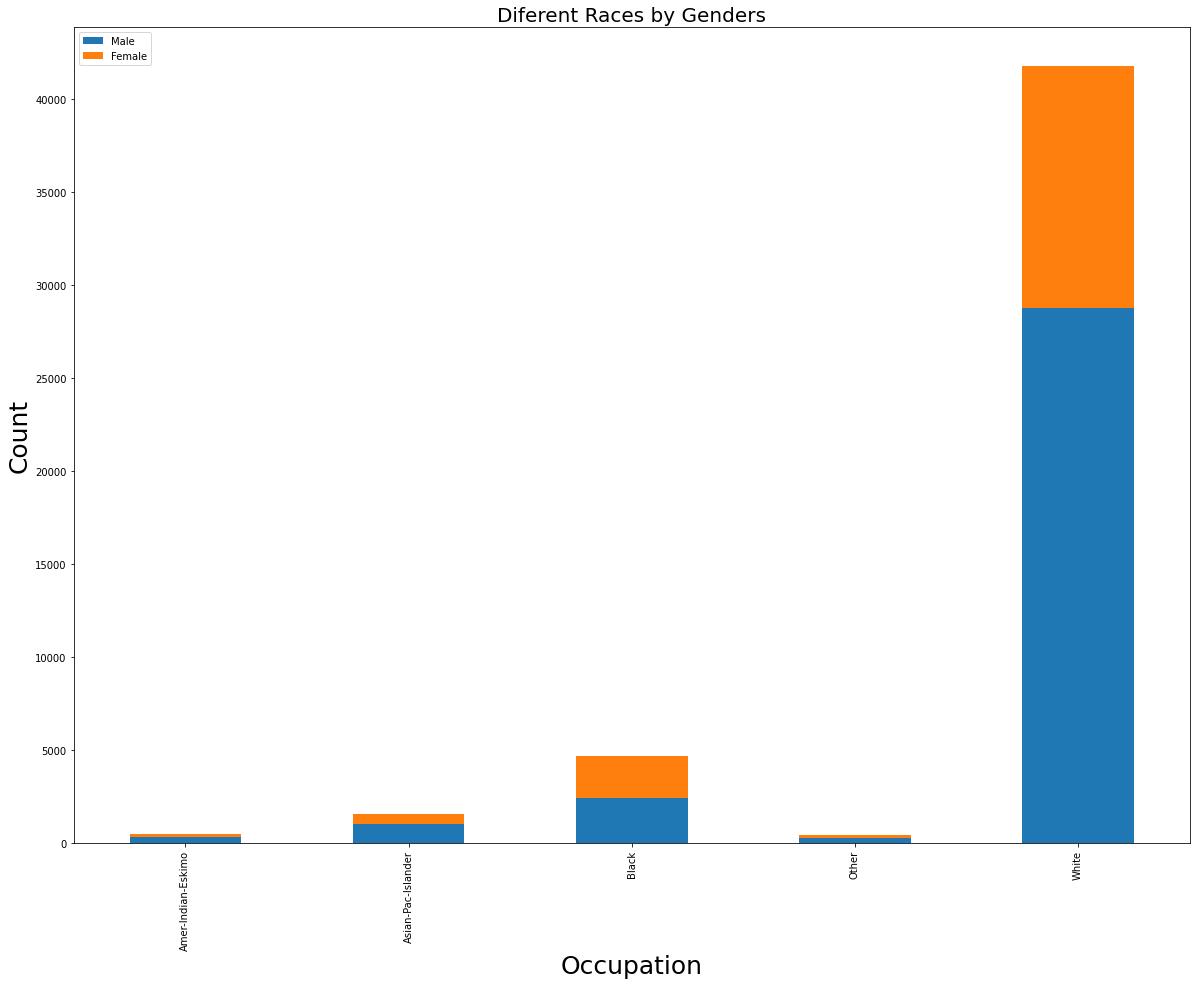

In [ ]:
m = df_c[df_c.gender == 'Male']['race'].value_counts(sort=False)
w = df_c[df_c.gender == 'Female']['race'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(20, 15)
plt.title("Diferent Races by Genders", size=20)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=25)
plt.ylabel('Count', size=25)
plt.show()

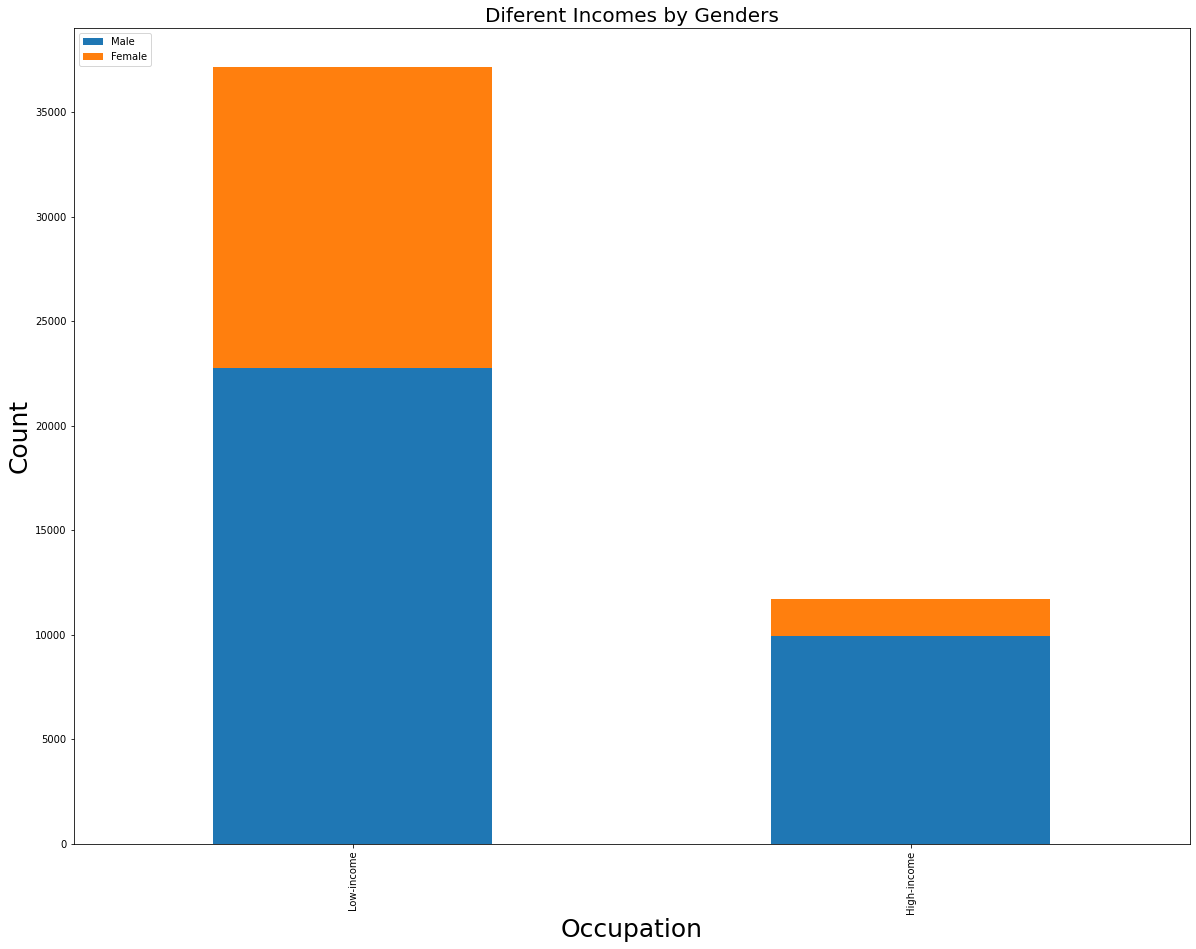

In [ ]:
m = df_c[df_c.gender == 'Male']['income'].value_counts(sort=False)
w = df_c[df_c.gender == 'Female']['income'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(20, 15)
plt.title("Diferent Incomes by Genders", size=20)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=25)
plt.ylabel('Count', size=25)
plt.show()

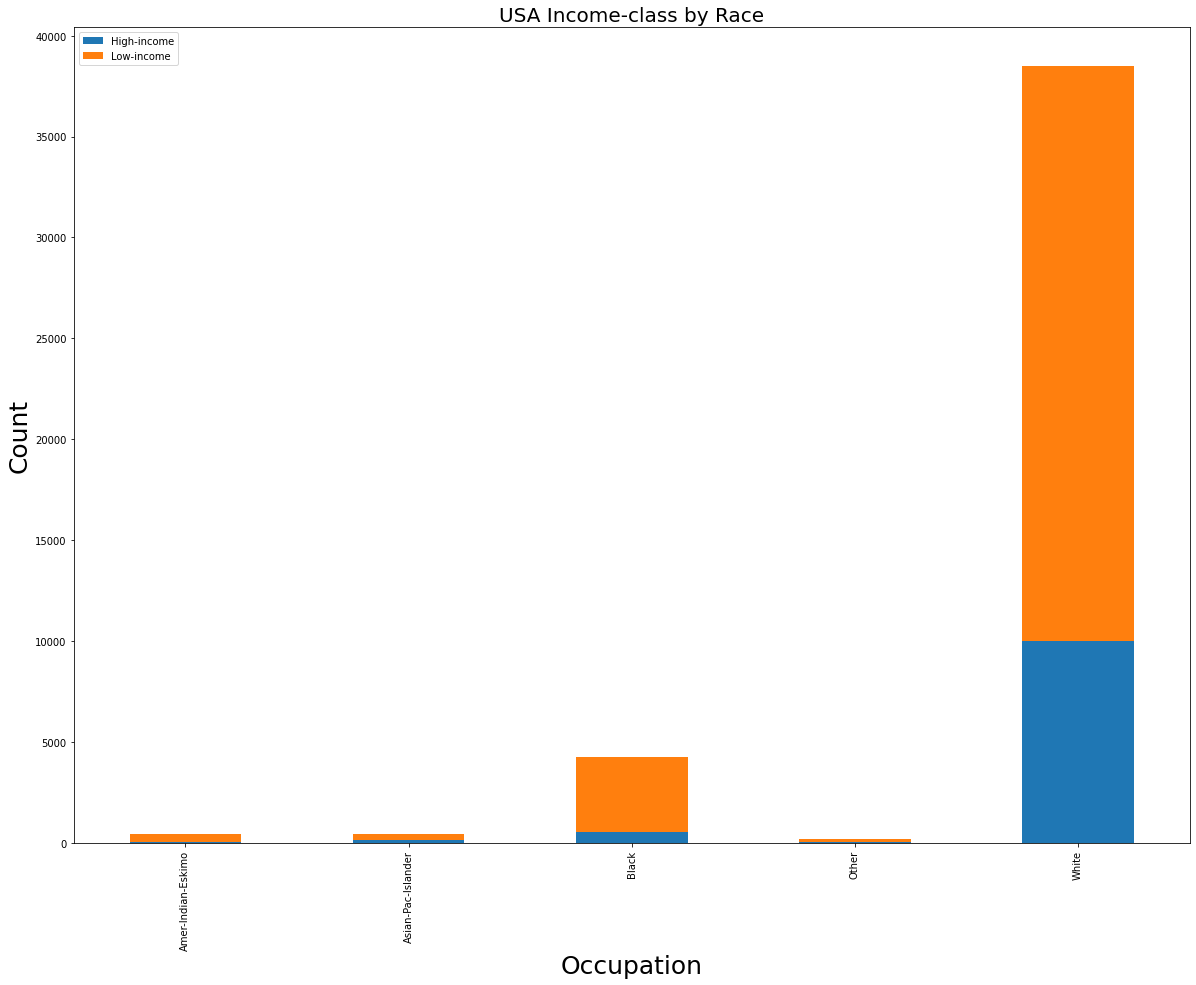

In [ ]:
h = df_c[(df_c.income == 'High-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
l = df_c[(df_c.income == 'Low-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
pd.DataFrame({'High-income': h, 'Low-income': l}).plot.bar(stacked=True)
plt.gcf().set_size_inches(20, 15)
plt.title("USA Income-class by Race", size=20)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=25)
plt.ylabel('Count', size=25)
plt.show()

**Preliminary observation**

To summarize our individual observations from the different plots, we have noted the following:

Gender and race discrimination can be observed in the dataset.

There are a greater number of job opportunities available in the job market for individuals with a medium education level, i.e., high-school graduates.

No clear winner exists for a specific type of job, indicating that the dataset aligns with the general trends of society.

**Preprocessing  for Classification**

To prepare the dataset for classification algorithms aimed at classifying individuals into higher and lower income groups, I further processed the data by converting text data to numerical data. This conversion was necessary as most of the algorithms I implemented require numerical input data. More details on this pre-processing step and the classification algorithms themselves are provided later in the report.

In [ ]:
encoding_dict = {"workclass": {'State-gov':1, 'Self-emp-not-inc':2, 'Private':3, 'Federal-gov':4,
                               'Local-gov':5, 'Unknown':6, 'Self-emp-inc':7, 'Without-pay':8, 'Never-worked':9},
                 "education": {'Bachelors':1, 'HS-grad':2, '11th':3, 'Masters':4, '9th':5, 'Some-college':6,
                               'Assoc-acdm':7, 'Assoc-voc':8, '7th-8th':9, 'Doctorate':10, 'Prof-school':11,
                               '5th-6th':12, '10th':13, '1st-4th':14, 'Preschool':15, '12th':16},
                 "marital_status": {'Never-married':1, 'Married-civ-spouse':2, 'Divorced':3,
                                    'Married-spouse-absent':4, 'Separated':5, 'Married-AF-spouse':6, 'Widowed':7},
                 "occupation": {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3,
                                'Prof-specialty':4, 'Other-service':5, 'Sales':6, 'Craft-repair':7,
                                'Transport-moving':8, 'Farming-fishing':9, 'Machine-op-inspct':10,
                                'Tech-support':11, 'Unknown':12, 'Protective-serv':13, 'Armed-Forces':14,
                                'Priv-house-serv':15},
                 "relationship": {'Not-in-family':1, 'Husband':2, 'Wife':3, 'Own-child':4, 'Unmarried':5,
                                  'Other-relative':6},
                 "race": {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4, 'Other':5},
                 "sex": {'Male':-1, 'Female':1},
                 "native_country": {'United-States':1, 'Cuba':2, 'Jamaica':3, 'India':4, 'Unknown':5, 'Mexico':6,
                                    'South':7, 'Puerto-Rico':8, 'Honduras':9, 'England':10, 'Canada':11,
                                    'Germany':12, 'Iran':13, 'Philippines':14, 'Italy':15, 'Poland':16,
                                    'Columbia':17, 'Cambodia':18, 'Thailand':19, 'Ecuador':20, 'Laos':21,
                                    'Taiwan':22, 'Haiti':23, 'Portugal':24, 'Dominican-Republic':25,
                                    'El-Salvador':26, 'France':27, 'Guatemala':28, 'China':29, 'Japan':30,
                                    'Yugoslavia':31, 'Peru':32, 'Outlying-US(Guam-USVI-etc)':33, 'Scotland':34,
                                    'Trinadad&Tobago':35, 'Greece':36, 'Nicaragua':37, 'Vietnam':38, 'Hong':39,
                                    'Ireland':40, 'Hungary':41, 'Holand-Netherlands':42},
                 "income": {'Low-income':-1, 'High-income':1},
                }

In [ ]:
df_c.replace(encoding_dict, inplace = True)

In [ ]:
# observe pairwise correlation of columns using library function
df_c.corr()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.068148,-0.076628,0.013058,0.030940,0.431386,0.009720,-0.217410,-0.039737,0.077229,0.056944,0.071558,-0.006370,0.230369
workclass,0.068148,1.000000,-0.002189,0.013493,0.010139,0.025971,0.214741,0.020929,0.006889,0.042534,0.017263,-0.032525,-0.009469,0.046431
fnlwgt,-0.076628,-0.002189,1.000000,0.023864,-0.038761,-0.025131,0.003532,0.019216,0.003802,-0.003706,-0.004366,-0.013519,0.033631,-0.006339
education,0.013058,0.013493,0.023864,1.000000,-0.284100,0.012084,0.076226,0.046597,0.026466,0.024521,-0.008308,-0.051574,0.067583,-0.048369
educational_num,0.030940,0.010139,-0.038761,-0.284100,1.000000,-0.066537,-0.243140,-0.139858,-0.037397,0.125146,0.080972,0.143689,-0.066659,0.332613
marital_status,0.431386,0.025971,-0.025131,0.012084,-0.066537,1.000000,0.007300,0.022268,0.011894,0.006833,0.007633,0.005277,0.002079,0.002517
occupation,0.009720,0.214741,0.003532,0.076226,-0.243140,0.007300,1.000000,-0.007697,0.012488,-0.046019,-0.024002,-0.048466,0.016658,-0.109354
relationship,-0.217410,0.020929,0.019216,0.046597,-0.139858,0.022268,-0.007697,1.000000,0.097324,-0.044636,-0.047800,-0.182892,0.039404,-0.170662
race,-0.039737,0.006889,0.003802,0.026466,-0.037397,0.011894,0.012488,0.097324,1.000000,-0.008014,-0.016804,-0.032681,0.236057,-0.063277
capital_gain,0.077229,0.042534,-0.003706,0.024521,0.125146,0.006833,-0.046019,-0.044636,-0.008014,1.000000,-0.031441,0.082157,-0.008485,0.223013


# III. Method

#### Instructions

You will need to complete the following:
- Implement the Pocket Perceptron, QDA, LDA, and Logistic Regression algorithms using the superclass `Classifier`.
    - The superclass `Classifier` defines common utility methods and class attributes/variables (read documentation for more information).    
    - You'll need to finish the `standardize()` method within the `Classifier` class as this will help you to standardize your data before training or making predictions. 
    
This section should include the following:
- A summary of the pocket algorithm, QDA, LDA, and logistic regression algorithms, using your own words.
- Explanations for your implementation of the code. The explanation of your code should not be the comments in a code cell.

In accordance with the requirements of this assignment, I implemented four classification algorithms, namely:

Pocket algorithm:-
Pocket algorithm is a modified version of the Perceptron algorithm for binary classification. Perceptron is a linear model that applies a step function on the linear output. It iterates over the training examples and updates the weights in a way that would result in the correct classification boundary. However, when the data is not linearly separable, there is no guarantee on convergence. Additionally, the perceptron algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best.

The pocket algorithm improves on the instability of the perceptron algorithm by keeping the best solution so far in its pocket. In other words, it maintains a separate weight vector that contains the best solution (i.e., minimum error) so far. The algorithm continues to iterate over the training examples and updates the weight vector based on the classification error. If the new weight vector results in lower error than the current best, the current best is replaced with the new one. Finally, the algorithm returns the weight vector that is stored in the pocket. This approach can be useful when the dataset is noisy, and the goal is to find the best possible classification boundary.

QDA: Quadratic Discriminant Analysis (QDA) is a type of Bayesian classifier. QDA assumes that each class has its own covariance matrix, meaning that the predictor variables are not assumed to have a common variance across each of the individual groups. It is able to provide non-linear decision boundaries generated by fitting class conditional densities to the data and using Bayes’ rule. QDA primarily leverages the covariances of the data along with the different means in an unfiltered way.

LDA: Linear Discriminant Analysis (LDA) finds a linear combination of features that can be used to characterize (or separate) two or more classes. It determines the group means and, for each individual, computes the probability of belonging to the different groups. The individual is then assigned to the group with the highest probability score. It provides linear decision boundaries based on the assumption that the observations vary consistently across all classes.

Logistic Regression: Logistic regression is an extension of linear regression that is used to predict the class for an observation. It considers a linear regression model that directly predicts the probability of a given input belonging to a certain class, not the class label itself.

### A. Super Classs Definition

We first define the super class for classification algorithms. You only need to complete the `standardize()` method. You shouldn't have to modify anything else within the `Classifier` class unless you really want to.

A super class is a class that serves as a base or parent class for other classes, also known as subclasses or derived classes. The super class provides a blueprint for the properties and behaviors that its subclasses inherit. Subclasses can add their own properties and behaviors or override those inherited from the super class. The use of super classes promotes code reusability, reduces code duplication, and improves the organization and maintainability of code.

For the rest of implementation, I inherited this class and make my own PocketAlgorithm, QDA_Algorithm, LDA_Algorithm, and LogisticRegression classes.

In [ ]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass

In [ ]:
# Confustion matrix 

def confusion_matrix(Y, T):
    """
        Method for calculating confusion matrix
        
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

### B. Pocket Algorithm

The PocketAlgorithm class contains two private variables, namely alpha and w_pocket. Alpha represents the learning rate, and w_pocket holds the best weight as the pocket. This class inherits two methods, train and use, from its parent class.

The train method trains the model and calculates the best weight. It iterates over the input samples and updates the weight based on the perceptron algorithm's formulation. In each iteration, this method compares the updated weight with the weight in the pocket. If the updated weight is better, it is copied to w_pocket.

The use method predicts the test input class. It returns the dot product of the input and w_pocket. However, one must call the train method before calling this method.

It is worth noting that the Pocket algorithm takes a lot of time to complete its iteration since it iterates over all the input samples and, for each input sample, iterates over all the features. Therefore, to reduce the computational time, a lower value was set for the maximum iteration parameter. However, this may lead to a suboptimal model performance.





In [ ]:
from copy import deepcopy as copy 

class PocketAlgorithm(Classifier):
    """
        Class for Pocket classification model
        
        Attributes
        ==========
        alpha       learning rate
    """
    
    def __init__(self, alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
        self.maxiter = 100
           
    # train PocketAlgorithm model and store the best weights in w_pocket
    def train(self, X, T):
        N = X.shape[0]
        X1 = self.add_ones(X)
        w = np.zeros(X1.shape[1])
        self.w_pocket = copy(w)
        missed_pocket = N + 1
        for i in range(self.maxiter):
            converged = True
            for k in range(N):
                missed = 0
                for x, t in zip(X1, T):
                    y = np.dot(w, x)
                    yt = 1.0 if (y > 0) else -1.0

                    if y != yt:
                        missed += 1
                        converged = False
                        delta = t - yt
                        w += (self.alpha * delta * x)
    
            if missed < missed_pocket:
                print("pocket update at: ", i)
                self.w_pocket = copy(w)
                missed_pocket = missed
                
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = self.add_ones(X)
        Y1 = X1 @ self.w_pocket
        return Y1


### C. QDA



The QDA_Algorithm class is a subclass of the base Classifier class and is responsible for implementing the QDA algorithm. This class inherits the train and use methods from the base class and adds additional logic specific to the QDA algorithm.

The train method of the QDA_Algorithm class calculates and returns the mean and covariance on the input set. The use method of this class represents the formulation of the QDA algorithm by first calculating the inverse of covariance and the distance between the sample and mean.

In [ ]:
from copy import deepcopy as copy 

class QDA_Algorithm(Classifier):
    """
        Class for QDA classification model
    """
    
    def __init__(self):
        Classifier.__init__(self)

    # calculate the mean and covarience on the input data X from starting (s) to end (e) boundary
    def train(self, X, S, E):
        mu = np.mean(X[S:E], 0)
        Sigma = np.cov(X[S:E].T)
        return mu,Sigma

    # apply the learned model to data X
    def use(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        dif = X - mu
        return np.log(prior) - (1/2 * np.log(np.linalg.det(sigma))) \
            - (1/2 * np.sum(dif @ sigma_inv * dif, axis=1))


### D. LDA

The LDA_Algorithm class is a subclass of the Classifier class that provides the implementation of the train and use methods for the LDA algorithm. The train method calculates the mean of the input data and the use method formulates the LDA equation using the input, mean, covariance, and prior. The LDA formula derivation is not covered in this assignment.

In [ ]:
from copy import deepcopy as copy 

class LDA_Algorithm(Classifier):
    """
        Class for LDA classification model
    """
    
    def __init__(self):
        Classifier.__init__(self)

    # calculate the mean on the input data X from starting (s) to end (e) boundary
    def train(self, X, S, E):
        mu = np.mean(X[S:E], 0)
        return mu

    # apply the learned model to data X
    def use(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv * mu) \
                - (1/2 * mu @ sigma_inv * mu) \
                + np.log(prior), axis=1)

### E. Logistic Regression

The LogisticRegression class extends the base Classifier class and provides implementation for the train and use methods for logistic regression. It has a private variable alpha and two helper methods: softmax and g.

The alpha variable represents the learning rate, while the softmax and g methods assist with the softmax transformation. Softmax transformation is a generalization of the logistic function to multiple dimensions. However, detailed explanation of the softmax transformation is not provided in this assignment.

The train method iteratively updates the weights by computing the derivative of the softmax transformation. As expected, the use method uses the logistic regression formula to predict the class label for the test input.

In [ ]:
from copy import deepcopy as copy
class LogisticRegression(Classifier): 
    """
        Class for Logistic Regression classification model
        
        Attributes
        ==========
        alpha       learning rate
    """
    def __init__(self, alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self, X, w):
        return self.softmax(X @ w) 
        
    # update w
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D + 1, K)

        niter = 10
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys)                
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX) / self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)


# IV. Experiments


#### Instructions
Apply EACH classifier to your own data and discuss the results. Please describe your codes for experiments. You should have a subsection (try using `##` while in a markdown cell)  for each experiment (i.e., classification algorithm) where you provide the code and discussions.

Here follows the list that you consider to include:
- **Data must be partitioned into training and testing set.**
- You might need to reformat your class labels to make certain algorithms work (e.g., perceptron and logistic regression).
- Select and discuss evaluation metrics
    - Utilize quantifiable metric(s) to evaluate your results, discuss said metric, and discuss the results of said metric for each algorithm using both the training and testing datasets.
- Discuss train and test metric results
    - For each experiment, compute the evaluation metrics (using the metrics you chose) for the training and testing data and discuss the results.
- Visualization of results
    - For each experiment, at least 1 visualization of the results is provided. Additionally, each visualization provides description regarding what the visualization is, why the visualization was used, and what was observed was provided.
- Model comparisons
    - Algorithm performance must be compared and a discussion concerning the best performing, worst performing, examples of differences in predictions, ect, should be provided. 

In [ ]:
# randomly shuffel all data
df_c.sample(frac=1)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
35614,55,7,298449,1,13,2,2,2,1,Male,0,2415,50,1,1
47830,33,3,97521,2,9,1,1,4,1,Male,0,0,40,1,-1
41068,58,6,361870,2,9,2,12,2,2,Male,0,0,30,1,-1
3458,46,3,105253,4,14,2,4,2,1,Male,0,1977,50,1,1
39993,56,3,65325,1,13,2,1,2,1,Male,0,0,50,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,34,3,93213,4,14,2,5,2,1,Male,0,0,30,1,-1
32459,56,3,101436,2,9,3,1,6,4,Female,0,0,35,1,-1
25806,33,3,143582,2,9,5,5,5,3,Female,0,0,48,29,-1
45979,55,6,227203,7,12,4,12,1,1,Female,0,0,5,1,-1


pocket update at:  0
End of training:  99


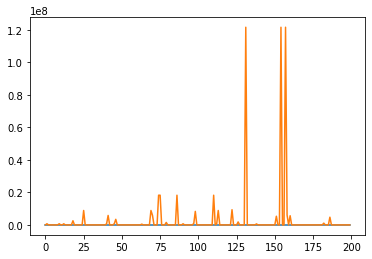

In [ ]:
# list of significant features
sig_features = ['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# list of target features
target_features = ['income']

# training data partition threshold
# train_data_th = 25000
train_data_th = 1000

# partitioning unscaled-data of most significant co-related features (i.e. correlation_val >= 0.5)
X = df_c[sig_features].copy()
X_Train = np.array(X.iloc[:train_data_th])
X_Test = np.array(X.iloc[train_data_th:1200])

# partitioning unscaled-data of target features
T = df_c[target_features].copy()
T_Train = np.array(T.iloc[:train_data_th])
T_Test = np.array(T.iloc[train_data_th:1200])
# print(T_Test.shape)

pkt = PocketAlgorithm(0.1)
pkt.train(X_Train, T_Train)
Y = pkt.use(X_Test)

plt.plot(T_Test)
plt.plot(Y)

In [ ]:
confusion_matrix(np.sign(Y),np.sign(T_Test).flatten())

,-1,1
-1,135,32
1,12,21


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

Y = np.where(Y > 0,1,-1)
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,Y)))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,Y)))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,Y)))

Precision: 63.64%
Recall: 39.62%
F1 score: 48.84%


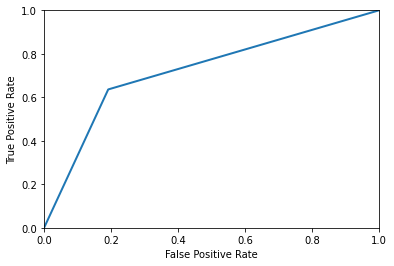

In [ ]:
falsepos, truepos, thresholds = roc_curve(Y,T_Test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Accuracy:  65.745 %


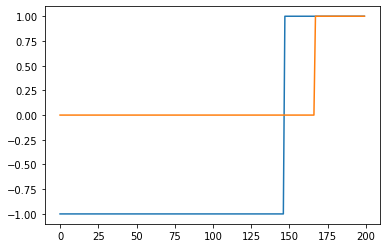

In [ ]:
Yl = np.where(Y<0,0,1)
Tl = np.where(T_Test<0,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

In [ ]:
df_qda = df_c[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']]
df_qda = df_qda.sample(10500)
df_qda_train = df_qda[:8000]
df_qda_test = df_qda[8000:]

T_Test = df_qda_test.drop(columns =['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week'])
df_qda_test = df_qda_test.drop(columns =['income'])

print("Total training entries:", len(df_qda_train))
c1 = df_qda_train[df_qda_train['income'] > 0]
c2 = df_qda_train[df_qda_train['income'] < 0]
print("Class-1 training entries:", len(c1))
print("Class-2 training entries:", len(c2))

C1 = c1[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N1 = len(C1)
C2 = c2[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N2 = len(C2)

X = np.vstack((C1, C2))
N = N1 + N2

qda = QDA_Algorithm()
Xs = qda.normalize(X)

mu1,Sigma1 = qda.train(Xs, 0, N1)
mu2,Sigma2 = qda.train(Xs, N1, N)

prior1 = N1 / N
prior2 = N2 / N

xs, ys = np.meshgrid(np.linspace(-3, 7, 50), np.linspace(-3, 7, 50))
#df2_test = np.vstack((xs.flat, ys.flat)).T
XtestS = qda.normalize(df_qda_test.values)
d1 = qda.use(XtestS, mu1, Sigma1, prior1)
d2 = qda.use(XtestS, mu2, Sigma2, prior2)


Total training entries: 8000
Class-1 training entries: 1923
Class-2 training entries: 6077


d1 shape: (2500,)
d2 shape: (2500,)
xs shape: (50, 50)
Xs shape: (8000, 5)
ys shape: (50, 50)


<ipython-input-130-5d736540bf55>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
<ipython-input-130-5d736540bf55>:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0.5, 'QDA P(x|Class=k)\n from disc funcs')

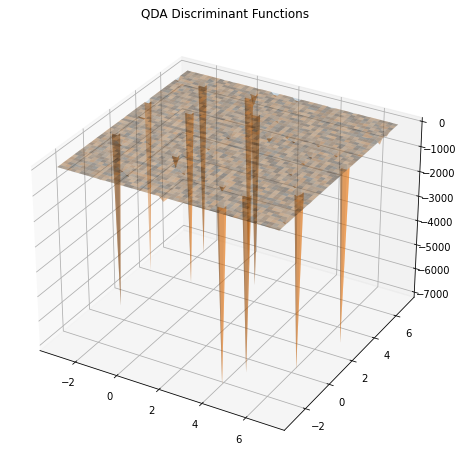

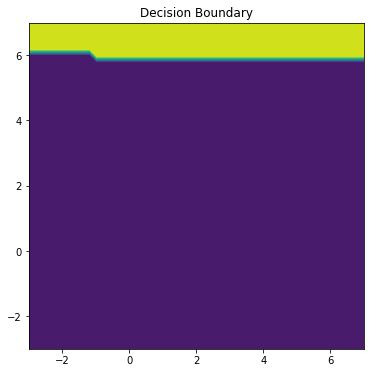

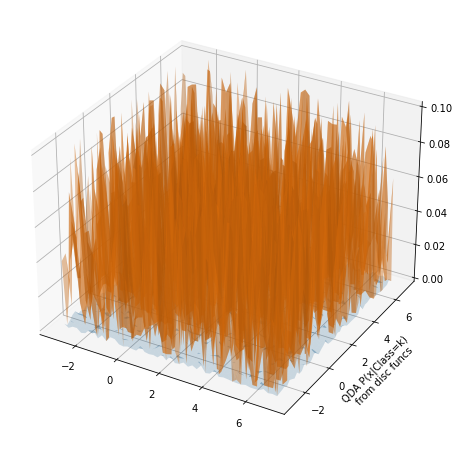

In [ ]:
print("d1 shape:", d1.shape)
print("d2 shape:", d2.shape)
print("xs shape:", xs.shape)
print("Xs shape:", Xs.shape)
print("ys shape:", ys.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")
#plt.plot(C1[:], 'or')
#plt.plot(C2[:],'xb')

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

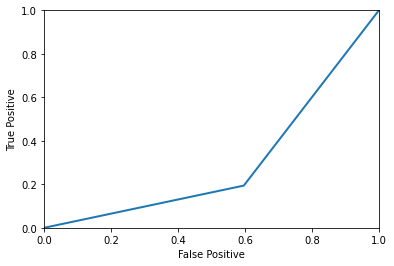

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

D_qda = []
D_qda.append(d1)
D_qda.append(d2)

D_qda = np.argmax(D_qda, axis=0)
for i in range(len(D_qda)):
    if D_qda[i] == 0:
        D_qda[i] = -1

falsepos, truepos, thresholds = metrics.roc_curve(D_qda, T_Test, pos_label=None)
plt.plot(falsepos, truepos, linewidth=2, label=None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Accuracy:  18.493440000000007 %


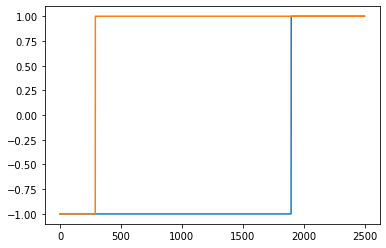

In [ ]:
Tl = np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(D_qda,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - D_qda)) * 100, "%")

In [ ]:
confusion_matrix(np.sign(D_qda), np.sign(T_Test.values).flatten())


,-1,1
-1,117,173
1,1781,429


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: {:.2f}%".format(100 * precision_score(T_Test, D_qda, average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test, D_qda, average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test, D_qda, average='micro')))

Precision: 21.84%
Recall: 21.84%
F1 score: 21.84%


In [ ]:
df_lda = df_c[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']]
df_lda = df_lda.sample(10500)
df_lda_train = df_lda[:8000]
df_lda_test = df_lda[8000:]

T_Test = df_lda_test.drop(columns =['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week'])
df_lda_test = df_lda_test.drop(columns =['income'])

print("Total training entries:", len(df_lda_train))
c1 = df_lda_train[df_lda_train['income'] > 0]
c2 = df_lda_train[df_lda_train['income'] < 0]
print("Class-1 training entries:", len(c1))
print("Class-2 training entries:", len(c2))

C1 = c1[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N1 = len(C1)
C2 = c2[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
N2 = len(C2)

X = np.vstack((C1, C2))
N = N1 + N2

lda = LDA_Algorithm()
Xs = lda.normalize(X)

mu1 = lda.train(Xs,0,N1)
mu2 = lda.train(Xs,N1,N)

Sigma = np.cov(Xs.T)
prior1 = N1 / N
prior2 = N2 / N

## now compute the discriminant function on test data
xs, ys = np.meshgrid(np.linspace(-3,7, 50), np.linspace(-3,7, 50))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = lda.normalize(df_lda_test.values)
d1 = lda.use(XtestS, mu1, Sigma, prior1)
d2 = lda.use(XtestS, mu2, Sigma, prior2)


Total training entries: 8000
Class-1 training entries: 1890
Class-2 training entries: 6110


<ipython-input-138-663bb4ba9ce1>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 1.0, 'Decision Boundary')

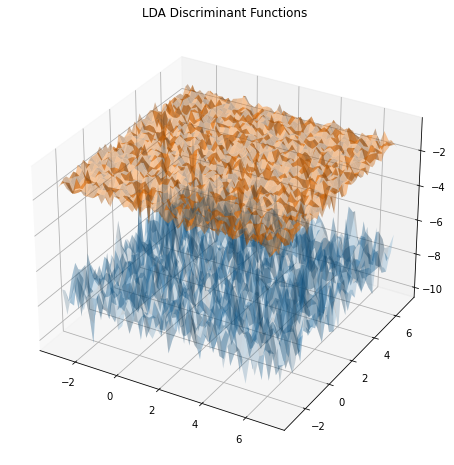

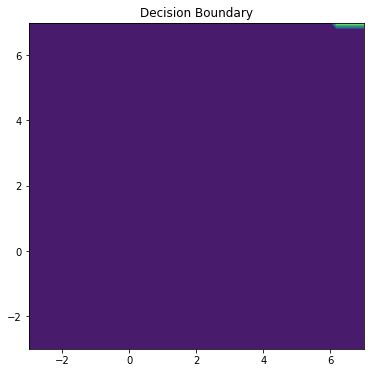

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys,np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")

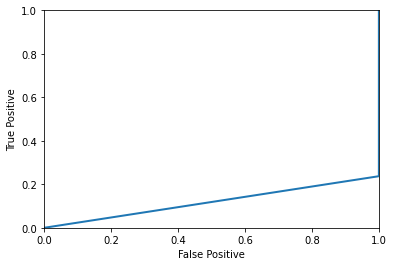

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

D_lda = []
D_lda.append(d1)
D_lda.append(d2)

D_lda = np.argmax(D_lda, axis=0)

for i in range(len(D_lda)):
    if D_lda[i] == 0:
        D_lda[i] = -1

falsepos, truepos, thresholds = metrics.roc_curve(D_lda, T_Test, pos_label=None)
plt.plot(falsepos, truepos, linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Accuracy:  23.784480000000002 %


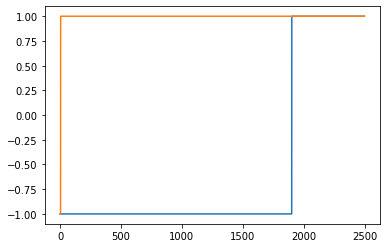

In [ ]:
Tl = np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(D_lda,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - D_lda)) * 100, "%")

In [ ]:
confusion_matrix(np.sign(D_lda), np.sign(T_Test.values).flatten())


,-1,1
-1,0,5
1,1903,592


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: {:.2f}%".format(100 * precision_score(T_Test, D_lda, average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test, D_lda, average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test, D_lda, average='micro')))

Precision: 23.68%
Recall: 23.68%
F1 score: 23.68%


In [ ]:
df_lr = df_c[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']]
df_lr = df_lr.sample(10500)
df_lr_train = df_lr[:8000]
df_lr_test = df_lr[8000:]

X_Test = df_lr_test[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']].values
T_Test = df_lr_test[['income']].values

X_Train = df_lr_train[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']].values
T_Train = df_lr_train[['income']].values

lr = LogisticRegression(0.000999)
lr.train(X_Train, T_Train)
Y = lr.use(X_Test)

Accuracy:  75.13168 %


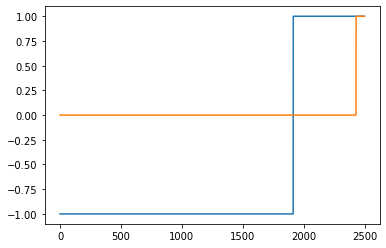

In [ ]:
Yl = np.argmax(Y, 1)
Tl = np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: {:.2f}%".format(100 * precision_score(T_Test, Yl, average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test, Yl, average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test, Yl, average='micro')))

Precision: 2.28%
Recall: 2.28%
F1 score: 2.28%


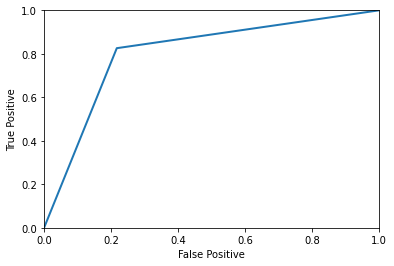

In [ ]:
falsepos, truepos, thresholds = metrics.roc_curve(Yl, T_Test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [ ]:
for i in range(len(Yl)):
    if Yl[i] == 0:
        Yl[i] = -1

confusion_matrix(np.sign(Yl), np.sign(T_Test).flatten())

,-1,1
-1,1903,528
1,12,57


# Conclusions

Summarize your work here. Provide a brief descriptions of what you did. Include things such as challenges, things learned, interesting takeaways, ect. If you have any suggestion about the assignment, you can write about it. 

# References

Provide least 2 references are given in APA or MLA format. These can be references to the data, papers, websites, ect.

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Basic cross-validation: Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

**Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing.** 



points | | description
--|--|:--
5 | Introduction| 
15 | Data | 
 |$\quad$5| $\quad$Description 
 |$\quad$5| $\quad$Plots for understanding or analysis 
 |$\quad$5| $\quad$Preliminary observation 
35 | Methods | 
 |$\quad$5| $\quad$Review/summary of classification models
 |$\quad$5| $\quad$Explanation of codes
 |$\quad$25| $\quad$Correct implementation of Pocket, LDA, QDA, Logistic Regression
30 | Experiments 
 |$\quad$5| $\quad$Discussion about evaluation metrics
 |$\quad$10| $\quad$Visualization of results (at least 1 for each algorithm)
 |$\quad$5| $\quad$Discussion about train and test metrics
 |$\quad$10| $\quad$analysis / comparison of algorithms
5 | Conclusions 
5 | References
5 | Grammar and spelling error (Proofread please)

# Preliminary Checks

## How Checks Influence Grading

**PLEASE READ CAREFULLY!**

The preliminary checks will give you a rough estimate of whether you will receive points or not for a given implementation. <u>These checks are there simply to make sure you are on the right track and they DO NOT STRICTLY determine your final grade for the algorithm implementations</u>. They are here largely to provide you with real-time feedback.


For example, some checks have to make assumption about implementations which can causes other implementations to fail the check. Thus, this doesn't mean you won't receive credit. If you fail a preliminary check by write detailed descriptions of your code, you can still receive points!

That being said, you SHOULD NOT edit the `prelim_checks.py` file as any edits or modifications of this file or ANY code within this section will be considered as cheating. We will also use our own `prelim_checks.py` files when grading to prevent tampering.


## How Checks Work

Below is all code related to the preliminary checks to help you test your algorithms. We'll be using some non-linear toy data generated by the `prelim_checks._n_make_nonlinear_fake_data()` function. Take a look at the output to see what the toy data looks like below.

To provide automatic tests we need to make assumptions about your implementations, without doing so, it is extremely difficult to make tests that accurately check the implementation of an algorithm without checking things like weights or other algorithm parameters. Thus, checks are done based on metrics such as the accuracy to provide you with more freedom when implementing the algorithms. Additional checks such as checking the `stdX` and `meanX` using required class variables are done to help ensure you are using the correct preprocessing. We can't check things like adding bias and what not sadly, however, we except poor accuracy will reflect this automatically.

That being said, `prelim_checks.py` file contains all code for the preliminary checks. We have decoupled the prelim check code from this notebook by storing it in a separate python file. As writing robust code checks is non-trival, some niche cases could break the checks causing them not to work for certain people. Thus, if we need to upload the `prelim_check.py` we will upload updated code to canvas. All you have to do is simply download the new file and place it in the same directory as this notebook. Any new `prelim_checks.py` releases will be announced.

Finally, to run the preliminary checks simply run the below code cells. In particular, the `run_checks()` function below will attempt to run your algorithms passing the toy data and default hyperparameters. Each algorithm will be tested and the final output will provide something like the following:

```
Algorithms ran without error: 4/4
Algorithms PASSED: 4/4
```

This output will tell which algorithms passed and ran without error. If a algorithm throws and error when training or testing it will automatically fail. Additionally, more detailed output regarding each algorithm and the checks it passes and fails will be provided.

X shape: (300, 2)
T shape: (300, 1)
T unique labels: [0 1]
Positive class (i.e., 1) sample count: 150
Negative class (i.e., 0) sample count: 150
Positive/Negative class ratio: 1.0


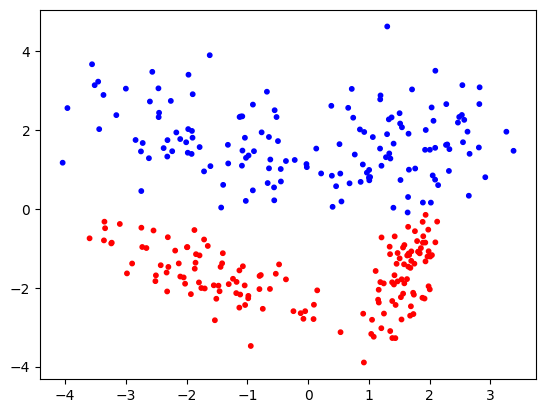

In [ ]:
# DO NOT EDIT THIS CODE CELL - ANY TAMPERING WILL LEAD TO POINT DEDUCTIONS!
import prelim_checks as prelim_checks

prelim_checks._make_nonlinear_fake_data(verbose=True);

In [ ]:
# DO NOT EDIT THIS CODE CELL - ANY TAMPERING WILL LEAD TO POINT DEDUCTIONS!
prelim_checks.PocketPerceptron = PocketPerceptron
prelim_checks.QDA = QDA
prelim_checks.LDA = LDA
prelim_checks.LogisticRegression = LogisticRegression 
prelim_checks.run_checks()

Building model PocketPerceptron
Training PocketPerceptron...
	Hyperparameters: 
		alpha = 0.1
		epochs = 10

--------------------------------------------------
TRAIN scores:
	accuracy: 0.5

--------------------------------------------------
TEST scores:
	accuracy: 0.5

--------------------------------------------------
CHECKS:
	Standardization Check:
		Mean Check None == [0.0935484  0.00621002] - FAILED
		STD Check None == [1.75113236 1.86454995] - FAILED
	Test Accuracy Check 0.5 == 0.983 - FAILED


FAILED CHECK(S) for PocketPerceptron: See above output!
Building model QDA
Training QDA...
	Hyperparameters: 

--------------------------------------------------
TRAIN scores:
	accuracy: 0.5

--------------------------------------------------
TEST scores:
	accuracy: 0.5

--------------------------------------------------
CHECKS:
	Standardization Check:
		Mean Check None == [0.0935484  0.00621002] - FAILED
		STD Check None == [1.75113236 1.86454995] - FAILED
	Test Accuracy Check 0.5 == 1.0 -